In [91]:
# import packages
import scimap as sm
import anndata as ad
import pandas as pd
import napari

## Load Anndata

In [92]:
image_path = ['D:/Projects/NKI_TMAs/Whole_slide_validation/tribus_analysis/input_data/S057_iOme.csv']
# 'D:/Projects/NKI_TMAs/Whole_slide_validation/tribus_analysis/input_data/S110_iTubR.csv'
output_path = "D:/Projects/NKI_TMAs/Whole_slide_validation/tribus_analysis/output_data"

In [93]:
adata = sm.pp.mcmicro_to_scimap(image_path, 
                                remove_dna=False, remove_string_from_name=None, log=False, drop_markers=None,
                                random_sample=None, unique_CellId=True, CellId='CellID', split='X_centroid',
                                custom_imageid=None, min_cells=None, output_dir=None)

Loading S057_iOme.csv


c:\Users\Localadmin_kangzigi\.conda\envs\scimap_nki\lib\site-packages\anndata\utils.py:292: UserWarning:

X converted to numpy array with dtype float64



In [94]:
del adata.uns["all_markers"][0] # remove 'Unnamed: 0'

In [95]:
adata.uns

OrderedDict([('all_markers',
              ['DNA1',
               'CD4',
               'CK7',
               'HLA-A',
               'Vimentin',
               'DNA2',
               'PAX8',
               'HLA-DPB1',
               'PD1',
               'DNA3',
               'CD45RO',
               'CD3D',
               'CD45',
               'DNA4',
               'IBA1',
               'CD11c',
               'CD8a'])])

## Define manual gate

In [96]:
# single 
#sm.pl.distPlot(adata, layer=None, markers=["CD11c","HLA-DPB1"], ncols=4, fontsize=6, figsize=(8,4))

In [97]:
%gui qt

In [98]:
tiffimage_path = 'D:/Projects/NKI_TMAs/Whole_slide_validation/cylinter/tif/S057_iOme.ome.tif'
marker_of_interest = 'HLA-DPB1'

In [99]:
sm.pl.gate_finder (tiffimage_path, adata, marker_of_interest, log=False,  
                   from_gate = 2.6, to_gate = 3.7, increment = 0.1, point_size=50, 
                   markers = ["HLA-DPB1"])

In [100]:
adata.uns

OrderedDict([('all_markers',
              ['DNA1',
               'CD4',
               'CK7',
               'HLA-A',
               'Vimentin',
               'DNA2',
               'PAX8',
               'HLA-DPB1',
               'PD1',
               'DNA3',
               'CD45RO',
               'CD3D',
               'CD45',
               'DNA4',
               'IBA1',
               'CD11c',
               'CD8a'])])

## Rescale the data

In [ ]:
adata.uns

OrderedDict([('all_markers',
              ['DNA1',
               'CD4',
               'CK7',
               'HLA-A',
               'Vimentin',
               'DNA2',
               'PAX8',
               'HLA-DPB1',
               'PD1',
               'DNA3',
               'CD45RO',
               'CD3D',
               'CD45',
               'DNA4',
               'IBA1',
               'CD11c',
               'CD8a'])])

OrderedDict([('all_markers',
              ['DNA1',
               'CD4',
               'CK7',
               'HLA-A',
               'Vimentin',
               'DNA2',
               'PAX8',
               'HLA-DPB1',
               'PD1',
               'DNA3',
               'CD45RO',
               'CD3D',
               'CD45',
               'DNA4',
               'IBA1',
               'CD11c',
               'CD8a'])])

In [ ]:
manual_gate = pd.read_csv("./manual_gates.csv")
adata = sm.pp.rescale(adata, gate=manual_gate, log=False, 
                      failed_markers={'all': ['DNA1', 'HLA-A', 'DNA2', 'HLA-DPB1', 'PD1', 'DNA3', 'CD45RO', 'CD3D', 'CD45', 'DNA4']}, 
                      imageid="imageid")

c:\Users\Localadmin_kangzigi\.conda\envs\scimap_nki\lib\site-packages\scimap\preprocessing\rescale.py:105: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Processing Failed Marker in S110_iTubR
GMM for ['S110_iTubR']
Finding the optimal gate by GMM for Unnamed: 0
Scaling Image S110_iTubR
Scaling Unnamed: 0
Scaling DNA1
Scaling CD4
Scaling CK7
Scaling HLA-A
Scaling Vimentin
Scaling DNA2
Scaling PAX8
Scaling HLA-DPB1
Scaling PD1
Scaling DNA3
Scaling CD45RO
Scaling CD3D
Scaling CD45
Scaling DNA4
Scaling IBA1
Scaling CD11c
Scaling CD8a


## Run phenotyping algorithm

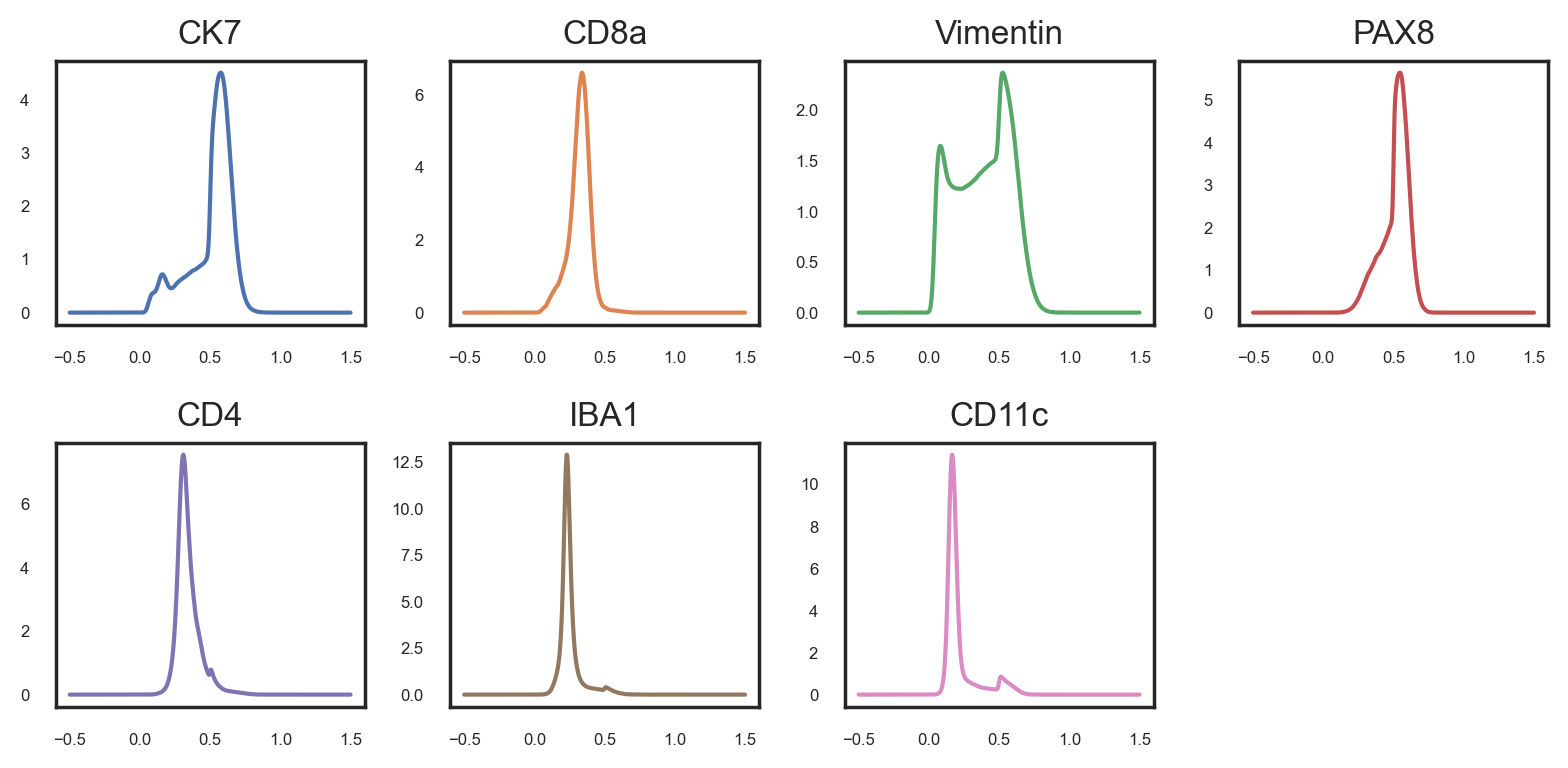

In [ ]:
sm.pl.distPlot(adata, layer=None, markers=['CK7', 'CD8a', 'Vimentin', 'PAX8', "CD4", "IBA1", "CD11c"], ncols=4, fontsize=6, figsize=(8,4))

In [ ]:
# load the phenotyping workflow
phenotype = pd.read_csv('./phenotype_workflow_2.csv')
# view the table:
phenotype.style.format(na_rep='')

,Unnamed: 0,Unnamed: 1,CK7,PAX8,Vimentin,CD4,CD8a,IBA1,CD11c
0,all,Cancer,anypos,anypos,,,,,
1,all,Stromal,,,pos,,,,
2,all,Immune,,,,anypos,anypos,anypos,anypos
3,Immune,CD4.T.cell,,,,pos,,,
4,Immune,CD8.T.cell,,,,,pos,,
5,Immune,Myeloid,,,,,,anypos,anypos
6,Myeloid,CD11c.Myeloid,,,,,,,pos
7,Myeloid,IBA1.Myeloid,,,,,,pos,


In [ ]:
adata = sm.tl.phenotype_cells(adata, gate = 0.3, phenotype=phenotype, label="final_label") 

Phenotyping Cancer
Phenotyping Stromal
Phenotyping Immune
-- Subsetting Immune
Phenotyping CD4.T.cell
Phenotyping CD8.T.cell
Phenotyping Myeloid
-- Subsetting Myeloid
Phenotyping CD11c.Myeloid
Phenotyping IBA1.Myeloid
Consolidating the phenotypes across all groups


c:\Users\Localadmin_kangzigi\.conda\envs\scimap_nki\lib\site-packages\scimap\tools\phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\Localadmin_kangzigi\.conda\envs\scimap_nki\lib\site-packages\scimap\tools\phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
# Summary of the phenotyping
adata.obs['final_label'].value_counts()

final_label
Cancer           856285
Stromal          159577
CD11c.Myeloid     48860
CD4.T.cell        22246
IBA1.Myeloid       6841
CD8.T.cell         4865
Unknown            1131
Name: count, dtype: int64

c:\Users\Localadmin_kangzigi\.conda\envs\scimap_nki\lib\site-packages\scimap\plotting\heatmap.py:312: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



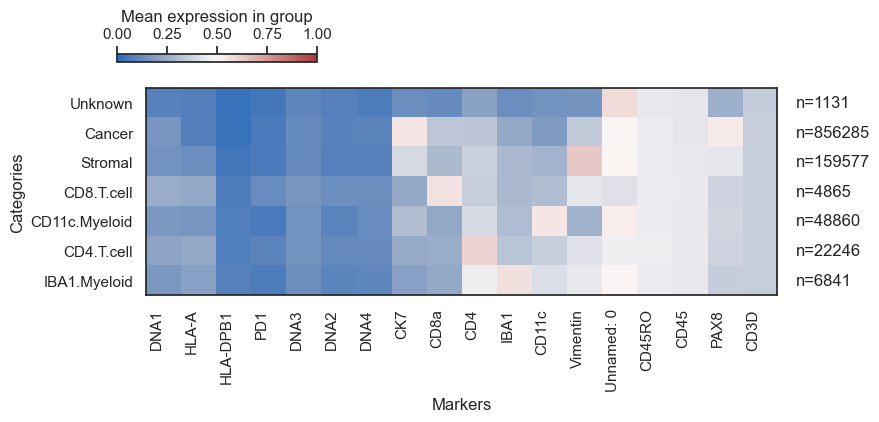

In [ ]:
# Heatmap (here values over 0.5 are considered positive as we have scaled the data)
sm.pl.heatmap(adata, groupBy='final_label', standardScale=None, figsize=(10,4), showPrevalence=True, vmin=0, vmax=1)

In [ ]:
labels = pd.DataFrame(adata.obs)
sample_name = "S110_iTubR"

In [ ]:
labels.to_csv('{}/{}_raw_scimap_annotated.csv'.format(output_path, sample_name))

## Reformat the annotation result

In [ ]:
sample_name = "S050_iAdn"
annotation_path = "D:/Projects/NKI_TMAs/Whole_slide_validation/tribus_analysis"

labels = pd.read_csv('{}/output_data/{}_raw_scimap_annotated_MHCII.csv'.format(annotation_path, sample_name))
raw_data = pd.read_csv('{}/input_data/{}.csv'.format(annotation_path, sample_name))

In [ ]:
labels = labels[["CellID", "final_label"]]
labels["Global"] = labels["final_label"]

In [ ]:
labels

,CellID,final_label,Global
0,1,Cancer,Cancer
1,11,Cancer,Cancer
2,15,Cancer,Cancer
3,23,Cancer,Cancer
4,24,Stromal,Stromal
...,...,...,...
1099800,1342485,Cancer,Cancer
1099801,1342487,Cancer,Cancer
1099802,1342489,Cancer,Cancer
1099803,1342490,Cancer,Cancer


In [ ]:
raw_data

,Unnamed: 0,CellID,DNA1,CD4,CK7,HLA-A,Vimentin,DNA2,PAX8,HLA-DPB1,...,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Sample,Condition,Replicate
0,1387893,1,5606.129952,2.792435,2.862011,2.599239,2.309730,5366.803487,3.192648,2.374381,...,12429.567353,631.0,NaN,NaN,0.761242,NaN,NaN,S110_iTubR,TSL,3
1,1387903,11,6607.225806,2.859602,2.974716,2.406600,2.596437,5617.974194,3.237773,2.410120,...,21231.503226,465.0,NaN,NaN,0.506173,NaN,NaN,S110_iTubR,TSL,3
2,1387907,15,3691.614561,2.814730,2.963384,2.420226,2.795555,3408.706638,3.188329,2.348874,...,12153.002141,467.0,NaN,NaN,0.776018,NaN,NaN,S110_iTubR,TSL,3
3,1387915,23,4242.786389,2.825768,3.016879,2.351275,2.411650,4049.461248,3.291815,2.374078,...,30855.202268,529.0,NaN,NaN,0.443688,NaN,NaN,S110_iTubR,TSL,3
4,1387916,24,2925.250712,2.835648,2.312335,3.119236,3.585806,2814.609687,2.790270,2.402163,...,13283.666667,351.0,NaN,NaN,0.452134,NaN,NaN,S110_iTubR,TSL,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099800,2730377,1342485,2821.938776,2.886359,2.954961,2.808480,3.006994,2424.234694,2.815890,2.383817,...,5989.061224,98.0,NaN,NaN,0.618773,NaN,NaN,S110_iTubR,TSL,3
1099801,2730379,1342487,3354.264368,2.956919,3.020305,3.032943,2.273709,3231.436782,3.028240,2.382723,...,3037.873563,87.0,NaN,NaN,0.563534,NaN,NaN,S110_iTubR,TSL,3
1099802,2730381,1342489,3921.000000,2.934250,3.056320,3.505665,2.520660,1489.293194,2.970749,2.357418,...,9239.089005,191.0,NaN,NaN,0.947666,NaN,NaN,S110_iTubR,TSL,3
1099803,2730382,1342490,5663.475806,2.846208,2.702035,2.377725,2.858082,5104.943548,3.140498,2.392316,...,36291.903226,124.0,NaN,NaN,0.618283,NaN,NaN,S110_iTubR,TSL,3


In [ ]:
result = pd.merge(raw_data, labels, on='CellID')

In [ ]:
result

,Unnamed: 0,CellID,DNA1,CD4,CK7,HLA-A,Vimentin,DNA2,PAX8,HLA-DPB1,...,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Sample,Condition,Replicate,final_label,Global
0,1387893,1,5606.129952,2.792435,2.862011,2.599239,2.309730,5366.803487,3.192648,2.374381,...,NaN,NaN,0.761242,NaN,NaN,S110_iTubR,TSL,3,Cancer,Cancer
1,1387903,11,6607.225806,2.859602,2.974716,2.406600,2.596437,5617.974194,3.237773,2.410120,...,NaN,NaN,0.506173,NaN,NaN,S110_iTubR,TSL,3,Cancer,Cancer
2,1387907,15,3691.614561,2.814730,2.963384,2.420226,2.795555,3408.706638,3.188329,2.348874,...,NaN,NaN,0.776018,NaN,NaN,S110_iTubR,TSL,3,Cancer,Cancer
3,1387915,23,4242.786389,2.825768,3.016879,2.351275,2.411650,4049.461248,3.291815,2.374078,...,NaN,NaN,0.443688,NaN,NaN,S110_iTubR,TSL,3,Cancer,Cancer
4,1387916,24,2925.250712,2.835648,2.312335,3.119236,3.585806,2814.609687,2.790270,2.402163,...,NaN,NaN,0.452134,NaN,NaN,S110_iTubR,TSL,3,Stromal,Stromal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099800,2730377,1342485,2821.938776,2.886359,2.954961,2.808480,3.006994,2424.234694,2.815890,2.383817,...,NaN,NaN,0.618773,NaN,NaN,S110_iTubR,TSL,3,Cancer,Cancer
1099801,2730379,1342487,3354.264368,2.956919,3.020305,3.032943,2.273709,3231.436782,3.028240,2.382723,...,NaN,NaN,0.563534,NaN,NaN,S110_iTubR,TSL,3,Cancer,Cancer
1099802,2730381,1342489,3921.000000,2.934250,3.056320,3.505665,2.520660,1489.293194,2.970749,2.357418,...,NaN,NaN,0.947666,NaN,NaN,S110_iTubR,TSL,3,Cancer,Cancer
1099803,2730382,1342490,5663.475806,2.846208,2.702035,2.377725,2.858082,5104.943548,3.140498,2.392316,...,NaN,NaN,0.618283,NaN,NaN,S110_iTubR,TSL,3,Cancer,Cancer


In [ ]:
result.to_csv('{}/output_data/{}_raw_scimap_annotated.csv'.format(annotation_path, sample_name))

# Gating by MHCII

In [297]:
sample_name = "S065_iOme"

annotation_path = "D:/Projects/NKI_TMAs/Whole_slide_validation/tribus_analysis"

labels = pd.read_csv('{}/output_data/{}_logic_table8_raw_tribus_annotated.csv'.format(annotation_path, sample_name))
#labels = pd.read_csv('{}/output_data/{}_raw_scimap_annotated.csv'.format(annotation_path, sample_name))

In [304]:
cancer_cells = labels.loc[labels['Global'] == "Cancer"]
cancer_cells

,Unnamed: 0.1,Unnamed: 0,CellID,DNA1,CD4,CK7,HLA-A,Vimentin,DNA2,PAX8,...,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Sample,Condition,Replicate,Global,final_label
0,0,445504,1,6273.284870,3.062509,3.777954,2.869370,2.584642,5277.066194,3.196841,...,NaN,NaN,0.670345,NaN,NaN,S065_iOme,GBM,1,Cancer,Cancer
1,1,445505,2,3494.711561,3.027711,3.881759,2.686974,2.631844,3594.438617,3.145419,...,NaN,NaN,0.819906,NaN,NaN,S065_iOme,GBM,1,Cancer,Cancer
4,4,445509,6,3611.018984,3.072340,4.268504,2.925069,2.605493,3528.452820,3.047134,...,NaN,NaN,0.754739,NaN,NaN,S065_iOme,GBM,1,Cancer,Cancer
7,7,445512,9,3592.273566,3.010053,3.102227,2.833491,2.903527,3205.165471,3.036340,...,NaN,NaN,0.564487,NaN,NaN,S065_iOme,GBM,1,Cancer,Cancer
8,8,445513,10,3943.689189,2.914432,3.848553,2.664733,2.731705,3199.227651,2.905188,...,NaN,NaN,0.577740,NaN,NaN,S065_iOme,GBM,1,Cancer,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283938,287890,780721,335220,6961.904040,3.114176,4.137769,3.306876,2.775556,6478.525253,3.100122,...,NaN,NaN,0.846316,NaN,NaN,S065_iOme,GBM,1,Cancer,Cancer
283940,287892,780723,335222,1525.347973,2.882367,4.235712,2.946225,2.486638,1230.165541,2.818407,...,NaN,NaN,0.528606,NaN,NaN,S065_iOme,GBM,1,Cancer,Cancer
283953,287905,780747,335247,4770.814453,3.070530,3.666387,2.981120,2.534528,3794.669922,3.093546,...,NaN,NaN,0.747410,NaN,NaN,S065_iOme,GBM,1,Cancer,Cancer
283971,287923,780771,335271,6835.323615,3.089590,3.530167,2.782933,2.505341,4134.982507,2.982966,...,NaN,NaN,0.752181,NaN,NaN,S065_iOme,GBM,1,Cancer,Cancer


In [305]:
cancer_cells['final_label'].values[cancer_cells['HLA-DPB1'].values > 3.1] = "Can.MHCII+"
cancer_cells['final_label'].value_counts()

final_label
Cancer        40052
Can.MHCII+     1295
Name: count, dtype: int64

In [306]:
cancer_cells.to_csv('{}/output_data/{}_raw_scimap_annotated_MHCII_cancer.csv'.format(annotation_path, sample_name))